# Blacktip Angler Demo
Demonstration of Blacktip Angler use cases for analysis of SEC public company filings.

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact, Text

from blacktip.angler import Angler

## Login
Using the login created on the [Blacktip website](http://blacktipresearch.com), login to Angler.

In [39]:
def login(u, p):
    print(f"username: {u}")
    print(f"password: {p}")
    instance = Angler(u, p)

instance = None 
interact(login, u="username", p="password")
# display(instance)
# instance = Angler(username, password)

username: username
password: password


<function __main__.login(u, p)>

In [33]:
def f(x):
    return x*x
interact(f, x=5)

25

<function __main__.f(x)>

## Query a Form
Using the instance, query a form (e.g. 10-K or 10-Q) for a specific company and period.

In [37]:
ticker = "FB" #can also use CIK
period = [2015, 2016, 2017, 2018, 2019] #can also be a list
form = instance.query10K(ticker, period)
display(form.form())

AttributeError: 'NoneType' object has no attribute 'query10K'

Search the data.

In [ ]:
display(form.asset_sheet().head())

In [5]:
form.filter("^NetIncomeLoss$")

,fy,2015,2016,2017,2018,2019
tag,uom,,,,,
NetIncomeLoss,USD,3.688000e+09,1.021700e+10,1.593400e+10,2.211200e+10,1.848500e+10


## Manipulate the Data
Using the form, we are able to display trends and calculate important metrics. 

In [6]:
ROE = form.calc_ROE()
display(ROE)

,fy,2015,2016,2017,2018,2019
tag,uom,,,,,
ROE,ratio,0.083405,0.172602,0.214319,0.262841,0.182922


In [ ]:
CurrentRatio = form.calc_CurrentRatio()
display(CurrentRatio)

In [ ]:
BookValue = form.calc_BookValue()
display(BookValue)

In [ ]:
DebtToEquity = form.calc_DebtToEquity(as_list=True)
print(DebtToEquity)

## Visualize Trends and Compare Companies
Compare companies on certain values over time.

In [7]:
metric = "^NetIncomeLoss$"
period = list(range(2009, 2020)) # 2009, 2010, 2011, ..., 2019
amzn_AssetsCurrent = instance.query10K("amzn", period).filter(metric)
aapl_AssetsCurrent = instance.query10K("aapl", period).filter(metric)

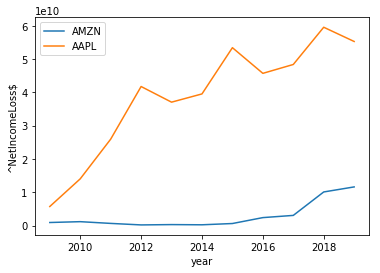

In [8]:
plt.plot(period, amzn_AssetsCurrent.values[0], label="AMZN")
plt.plot(period, aapl_AssetsCurrent.values[0], label="AAPL")
plt.legend()
plt.xlabel("year")
plt.ylabel(metric)